In [1]:
## normal
import os
import sys
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

# Analyse bootstrapped iterative Boruta

In [2]:
def mergeDictionary(dict_all, dict_2):
    for key, value in dict_2.items():
        if key in dict_all and key in dict_2:
            dict_all[key].append(dict_2[key])
        else:
            dict_all[key] = [dict_2[key]]
    return dict_all

/tmp/ipykernel_3903916/463694180.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[0],rotation=90)


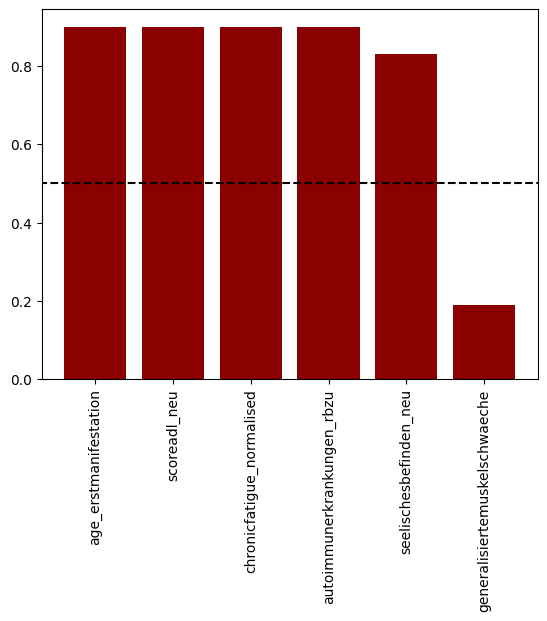

,0,1
0,age_erstmanifestation,0.900
1,scoreadl_neu,0.900
3,chronicfatigue_normalised,0.900
4,autoimmunerkrankungen_rbzu,0.900
2,seelischesbefinden_neu,0.832
5,generalisiertemuskelschwaeche,0.190


In [5]:
''' Load data '''

save_on = True
thresh = 0.5

perc=100
target = "gender"
dataset = "natural"     #natrual #fullRegistry #"histologie_subgroup"

PATH = "/home/WUR/katz001/PROJECTS/myaReg-genderDifferences"
PATH_out = f"{PATH}/results/20_featureSelection/{dataset}/boruta"

dic_all = dict()

n_bootstrap = 10 # 50
for i in range(1,n_bootstrap):
    outname_json=f"{i}__{target}_iterativeBoruta_{perc}perc.json"
    with open(f"{PATH_out}/{outname_json}", "r") as f: dict_iterBoruta = json.load(f)
    dic_all = mergeDictionary(dic_all, dict_iterBoruta)


''' Weight by how often it is found in bootstrap '''
dict_weighedResults = dict()
for key, val in dic_all.items():
    row = np.array(val)
    try: 
        weighted_row = row.mean() * (len(row)/n_bootstrap)
    except TypeError:
        weighted_row = row.mean() * (1/n_bootstrap)
    dict_weighedResults[key] = weighted_row
dict_weighedResults


''' Plot '''
fig, ax = plt.subplots()
df = pd.DataFrame(dict_weighedResults.items()).sort_values(1, ascending=False)
ax.hlines(0.5, -2, 20, linestyles="dashed", color="black")
#ax.hlines(0.31, -2, 20, linestyles="dashed", color="blue")
ax.bar(x=df[0], height=df[1], color="darkred")
ax.set_xticklabels(df[0],rotation=90)
plt.show()



if save_on: 
    ''' Save those above threshold (50%)?'''
    outname=f"{target}_bootstrapped_iterativeBoruta_{perc}perc.txt"
    with open(f"{PATH_out}/{outname}", "w") as f: 
        for key, val in dict_weighedResults.items():
            if val > thresh: 
                f.write(key+"\n")

df
